Calibration of the optical lattice depth
====
$$
\def\bra#1{\mathinner{\left\langle{#1}\right|}}
\def\ket#1{\mathinner{\left|{#1}\right\rangle}}
\def\braket#1#2{\mathinner{\left\langle{#1}\middle|#2\right\rangle}}
$$
The initial state of an atom should be $\ket{\Psi(t<0)} = \ket{k=0}$ as the momentum distribution of a BEC has a very sharp peak at $k=0$. A BEC suddenly loaded into a lattice can be described as superposition of Bloch states $\ket{k,n}$:
\begin{equation}
\ket{\Psi(t=0)} = \sum_{n=0}^{\infty} \ket{q,n} \braket{q,n}{ k=0}.   \\
\end{equation}
Recalling 
\begin{equation}
\ket{q,n} = \sum_{m=0,\pm 1, \cdots} A_{m}^{q,n} \ket{q+m K}, \\
\end{equation}
we get
\begin{equation}
\braket{q,n}{k=0} = (A_{m=0}^{q=0,n})^{\ast}.
\end{equation}
Then, while the BEC wavepacket is held in the lattice, it evolves in time according to
\begin{equation}
\ket{\Psi(t)} = \sum_{n=0}^{\infty} (A_{m=0}^{q=0,n})^{\ast} {\rm{exp}} \left( -i \frac{E_{q,n}}{\hbar} t \right) \ket{q,n}. \\
\end{equation}
Projecting the above onto the plane-wave basis, we obtain the coefficients $B_{m}^{q}$ of each $\ket{q+mK}$ in the lattice frame:
\begin{equation}
B_{m}^{q} = \sum_{n=0}^{\infty} (A_{l=0}^{q'=0,n})^{\ast} A_{m}^{q}  \left( -i \frac{E_{q,n}}{\hbar} t \right) . \\
\end{equation}
$q$ is a parameter, but usually chosen to zero as momentum of a BEC does not change during pulsed lattice.

Parameters
===

In [1]:
import numpy as np
lambda_L = 810*10**(-9) #wave lenght of triangular lattice beam [m] 
h_bar = 1.054571596*10**(-34) #Converted Plank const
mrb = 87*1.66053873*10**(-27) #Single atom mass of 87Rb
er = h_bar**2/(2*mrb)*(2*np.pi/lambda_L)**2 #Recoil energy of 1064nm lattice

angle = 18 # relative angle between two beams [degree]
theta = angle*np.pi/180
d_d = lambda_L / (2*np.sin(theta/2)) # lattice constant of diagonal lattice [m]
er_d = h_bar**2*np.pi**2/(2*mrb*d_d**2) #Recoil energy of diagonal lattice

n = 100
m = 20
s_d = 15 #potential depth in definition of Er (not Er_d)
s = s_d*er_d/er

Hamiltonian
===

In [2]:
Nsite = 2*n+1
H = np.zeros([Nsite, Nsite])

q = np.array([0])
E = np.zeros([q.size, Nsite])
tmp = np.eye(Nsite-1)
Htmp = np.zeros([Nsite, Nsite])
Htmp[0:Nsite-1, 1:Nsite] += -s_d/4 * tmp
Htmp[1:Nsite, 0:Nsite-1] += -s_d/4 * tmp

C = np.zeros([Nsite, q.size, Nsite])
C0 = np.zeros([Nsite,q.size])
for i_q in range(q.size):
        H = np.copy(Htmp)
        for i in range(Nsite):
            H[i][i] = (2*(i-(Nsite-1)/2) + q[i_q])**2 + s_d/2

        
        E0, P = np.linalg.eig(H)
        C0[:,i_q] = P[:,np.argmin(E0)]
        rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
        E[i_q, :], tmp = map(list, zip(*rearrangedEvalsVecs))

Energy = E.T

Band gap
===

In [3]:
upper_band_index = 4
band_index_list = range(1,upper_band_index)
gap=list(map(lambda x: (E[0,x]-E[0,0])*er_d/(h_bar*2*np.pi), band_index_list)) #gap[Hz]
period_list = list(map(lambda x: "{:.2f}".format(1/gap[x]*10**6),range(len(band_index_list))))
gap_name_list = list(map(lambda x:"n=1 to " + str(x+1) + r": $\tau$ ="+period_list[x-1]+r"[$\mu s$]", band_index_list ))

Time evolution according to Schrodinger eq.
---

In [4]:
t = np.linspace(0,3000,200)
m_list = [0,1,-1,2,-2]

pm = np.zeros([len(t),len(m_list)])

for i_t, tp in enumerate(t):
    for i_m, mp in enumerate(m_list):
        pm[i_t,i_m] =np.abs(np.sum(P[n+mp,:]*P[n,:]*np.exp(-1.j*E0*er_d/h_bar*tp*10**(-6))))**2 

Plot results
===

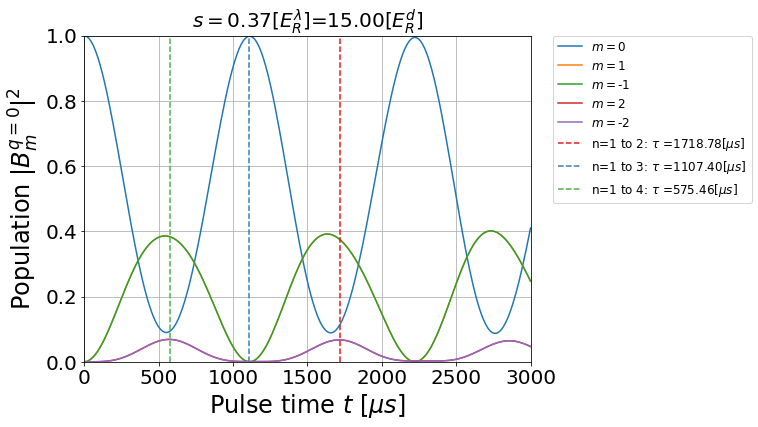

In [5]:
import matplotlib.pyplot as plt
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
depth_label_1= "{:.2f}".format(s)
depth_label_2= "{:.2f}".format(s_d)
plt.figure(figsize=[8,6])
list(map(lambda x: plt.plot(t,pm[:,x],label=r"$m=$"+str(m_list[x])), range(len(m_list))))
plt.xlim(min(t),max(t))
plt.ylim(0,1)
plt.xlabel(r'Pulse time $t$ [$\mu s$]', fontsize=24)
plt.ylabel(r'Population $|B_{m}^{q=0}|^2$', fontsize=24)
plt.xticks(fontsize="20")
plt.yticks(fontsize="20")
plt.grid()
plt.title(r'$s=$'+depth_label_1+r'[$E_R^{\lambda}$]='+depth_label_2+r'[$E_R^{d}$]', fontsize=20)
list(map(lambda x: plt.axvline(x=1/gap[x]*10**6, label=gap_name_list[x],c=colorlist[x],linestyle='--') , range(len(band_index_list))))
lg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
lg.get_title().set_fontsize(15)
